

Gaming using pixels and not physical states.

Base input- game specific inputs (like cart position or pole angle) Input- Instead of using specific environment inputs,
use pixels.
Going to be more general and use something that all games have in common — pixels.




This short code was playing random games for us, now we'll need to build our own render, GetImage, reset and step functions to work with pixels.

Before we used env.render() function, when we wanted to see how our agent plays the game. here we will use env.render(mode='rgb_array') it will return us rendered frame image, this way we'll get our game image.

env.render(mode='rgb_array") returns a numpy array containing the raw pixel representation of the current state.





Build own render, GetImage, reset and step functions to work with pixels.




env.render(mode=’rgb_array’) it will return us rendered frame image, this way we’ll get our image.


In [4]:

img = env.render(mode='rgb_array')

print(img.shape)
print(img)

(400, 600, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]



Cartpole gym environment outputs 600x400 RGB arrays (600x400x3).
way too many pixels so convert it to grayscale and downsize it 


In [8]:
import cv2
img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_rgb_resized = cv2.resize(img_rgb, (240, 160), interpolation=cv2.INTER_CUBIC)

In [10]:
img_rgb_resized[img_rgb_resized < 255] = 0

By stacking 4 frames

Derive the direction, velocity and acceleration of the moving objects.

Assuming that for each step we are going to store 4 last frames, our input shape will be 240x160x4. 

First, we’ll define our 4 frame image memory:
image_memory = np.zeros((4, 160, 240))

In [11]:


def imshow(self, image, rem_step=0):
        cv2.imshow(env_name+str(rem_step), image[rem_step,...])
        if cv2.waitKey(25) & 0xFF == ord("q"):
            cv2.destroyAllWindows()
            return
        
        

In [12]:


def GetImage(self):
        img = self.env.render(mode='rgb_array')
  
        img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img_rgb_resized = cv2.resize(img_rgb, (self.COLS, self.ROWS), interpolation=cv2.INTER_CUBIC)
        img_rgb_resized[img_rgb_resized < 255] = 0
        img_rgb_resized = img_rgb_resized / 255
        self.image_memory = np.roll(self.image_memory, 1, axis = 0)
        self.image_memory[0,:,:] = img_rgb_resized
        self.imshow(self.image_memory,0)
        
        return np.expand_dims(self.image_memory, axis=0)
    
    
    

In [ ]:

PROCEDURE




Take in images from the game and preprocess them (remove color, background, downsample etc.).


Use the Neural Network to compute a probability of actions.


Sample from that probability distribution and tell the agent to move up or down pr left or right.


By the end of the episode (if you were able to balance the cart or not ), find whether you won or lost.
When the episode has finisheds, pass the result through the backpropagation algorithm to compute the gradient for our weights.


After few episodes have finished, sum up the gradient and move the weights in the direction of the gradient.
Repeat this process until our weights are tuned. 




DQN using convolutional neural network





In [18]:
import gym
import random
import numpy as np
import cv2
class DQN_CNN_Agent:
    def __init__(self, env_name):
        self.env_name = env_name       
        self.env = gym.make(env_name)
        self.ROWS = 160
        self.COLS = 240
        self.REM_STEP = 4
        self.EPISODES = 10
        self.image_memory = np.zeros((self.REM_STEP, self.ROWS, self.COLS))
    def imshow(self, image, rem_step=0):
        cv2.imshow(env_name+str(rem_step), image[rem_step,...])
        if cv2.waitKey(25) & 0xFF == ord("q"):
            cv2.destroyAllWindows()
            return
    def GetImage(self):
        img = self.env.render(mode='rgb_array')
  
        img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img_rgb_resized = cv2.resize(img_rgb, (self.COLS, self.ROWS), interpolation=cv2.INTER_CUBIC)
        img_rgb_resized[img_rgb_resized < 255] = 0
        img_rgb_resized = img_rgb_resized / 255
        self.image_memory = np.roll(self.image_memory, 1, axis = 0)
        self.image_memory[0,:,:] = img_rgb_resized
        self.imshow(self.image_memory,0)
        
        return np.expand_dims(self.image_memory, axis=0)
    
    def reset(self):
        self.env.reset()
        for i in range(self.REM_STEP):
            state = self.GetImage()
        return state
    
    
    
    def step(self,action):
        next_state, reward, done, info = self.env.step(action)
        next_state = self.GetImage()
        return next_state, reward, done, info
    
    
    
    def run(self):
       
        for episode in range(self.EPISODES):
            self.reset()
            # this is each frame, up to 500...
            for t in range(500):               
               
                # In this environment, the action can be 0 or 1, which is left or right
                action = self.env.action_space.sample()
              
                next_state, reward, done, info = self.step(action)
                
                
                
               
                print(t, next_state, reward, done, info, action)
                if done:
                    break
if __name__ == "__main__":
    env_name = 'CartPole-v1'
    agent = DQN_CNN_Agent(env_name)
    agent.run()

0 [[[[1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   ...
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]]

  [[1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   ...
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]]

  [[1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   ...
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]]

  [[1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   ...
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]]]] 1.0 False {} 1
1 [[[[1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   ...
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]]

  [[1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 1. ... 1. 1. 1.]
   ...
   [1. 1. 1. ... 1. 1. 1.]
   [1. 1. 

In [ ]:
import os
import random
import gym
import pylab
import numpy as np
from collections import deque
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Lambda, Add
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

def OurModel(input_shape, action_space, dueling):
    X_input = Input(input_shape)
    X = X_input

    # 'Dense' is the basic form of a neural network layer
    # Input Layer of state size(4) and Hidden Layer with 512 nodes
    X = Dense(512, input_shape=input_shape, activation="relu", kernel_initializer='he_uniform')(X)

    # Hidden layer with 256 nodes
    X = Dense(256, activation="relu", kernel_initializer='he_uniform')(X)
    
    # Hidden layer with 64 nodes
    X = Dense(64, activation="relu", kernel_initializer='he_uniform')(X)

    if dueling:
        state_value = Dense(1, kernel_initializer='he_uniform')(X)
        state_value = Lambda(lambda s: K.expand_dims(s[:, 0], -1), output_shape=(action_space,))(state_value)

        action_advantage = Dense(action_space, kernel_initializer='he_uniform')(X)
        action_advantage = Lambda(lambda a: a[:, :] - K.mean(a[:, :], keepdims=True), output_shape=(action_space,))(action_advantage)

        X = Add()([state_value, action_advantage])
    else:
        # Output Layer with # of actions: 2 nodes (left, right)
        X = Dense(action_space, activation="linear", kernel_initializer='he_uniform')(X)

    model = Model(inputs = X_input, outputs = X)
    model.compile(loss="mean_squared_error", optimizer=RMSprop(lr=0.00025, rho=0.95, epsilon=0.01), metrics=["accuracy"])

    model.summary()
    return model

class DQNAgent:
    def __init__(self, env_name):
        self.env_name = env_name       
        self.env = gym.make(env_name)
        self.env.seed(0)  
        # by default, CartPole-v1 has max episode steps = 500
        self.env._max_episode_steps = 4000
        self.state_size = self.env.observation_space.shape[0]
        self.action_size = self.env.action_space.n

        self.EPISODES = 1000
        self.memory = deque(maxlen=2000)
        
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01 # minimum exploration probability
        self.epsilon_decay = 0.999 # exponential decay rate for exploration prob
        self.batch_size = 32 
        self.train_start = 1000

        # defining model parameters
        self.ddqn = True # use doudle deep q network
        self.Soft_Update = False # use soft parameter update
        self.dueling = True # use dealing netowrk

        self.TAU = 0.1 # target network soft update hyperparameter

        self.Save_Path = 'Models'
        if not os.path.exists(self.Save_Path): os.makedirs(self.Save_Path)
        self.scores, self.episodes, self.average = [], [], []
        
        if self.ddqn:
            print("---------- DQN--------")
            self.Model_name = os.path.join(self.Save_Path,"Dueling DDQN_"+self.env_name+".h5")
        else:
            print("-------------DQN------------")
            self.Model_name = os.path.join(self.Save_Path,"Dueling DQN_"+self.env_name+".h5")
        
        # create main model and target model
        self.model = OurModel(input_shape=(self.state_size,), action_space = self.action_size, dueling = self.dueling)
        self.target_model = OurModel(input_shape=(self.state_size,), action_space = self.action_size, dueling = self.dueling)
        
        
class SkipEnv(gym.Wrapper):
    def __init__(self, env=None, skip=4):
        super(SkipEnv, self).__init__(env)
        self._skip = skip

    def step(self, action):
        t_reward = 0.0
        done = False
        for _ in range(self._skip):
            obs, reward, done, info = self.env.step(action)
            t_reward += reward
            if done:
                break
        return obs, t_reward, done, info

    # after some time interval update the target model to be same with model
    def update_target_model(self):
        if not self.Soft_Update and self.ddqn:
            self.target_model.set_weights(self.model.get_weights())
            return
        if self.Soft_Update and self.ddqn:
            q_model_theta = self.model.get_weights()
            target_model_theta = self.target_model.get_weights()
            counter = 0
            for q_weight, target_weight in zip(q_model_theta, target_model_theta):
                target_weight = target_weight * (1-self.TAU) + q_weight * self.TAU
                target_model_theta[counter] = target_weight
                counter += 1
            self.target_model.set_weights(target_model_theta)

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        if len(self.memory) > self.train_start:
            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay

    def act(self, state):
        if np.random.random() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            return np.argmax(self.model.predict(state))

    def replay(self):
        if len(self.memory) < self.train_start:
            return
        # Randomly sample minibatch from the memory
        minibatch = random.sample(self.memory, self.batch_size)

        state = np.zeros((self.batch_size, self.state_size))
        next_state = np.zeros((self.batch_size, self.state_size))
        action, reward, done = [], [], []

        # do this before prediction
        # for speedup, this could be done on the tensor level
        # but easier to understand using a loop
        for i in range(self.batch_size):
            state[i] = minibatch[i][0]
            action.append(minibatch[i][1])
            reward.append(minibatch[i][2])
            next_state[i] = minibatch[i][3]
            done.append(minibatch[i][4])

        # do batch prediction to save speed
        # predict Q-values for starting state using the main network
        target = self.model.predict(state)
        # predict best action in ending state using the main network
        target_next = self.model.predict(next_state)
        # predict Q-values for ending state using the target network
        target_val = self.target_model.predict(next_state)

        for i in range(len(minibatch)):
            # correction on the Q value for the action used
            if done[i]:
                target[i][action[i]] = reward[i]
            else:
                if self.ddqn: # Double - DQN
                    # current Q Network selects the action
                    # a'_max = argmax_a' Q(s', a')
                    a = np.argmax(target_next[i])
                    # target Q Network evaluates the action
                    # Q_max = Q_target(s', a'_max)
                    target[i][action[i]] = reward[i] + self.gamma * (target_val[i][a])   
                else: # Standard - DQN
                    # DQN chooses the max Q value among next actions
                    # selection and evaluation of action is on the target Q Network
                    # Q_max = max_a' Q_target(s', a')
                    target[i][action[i]] = reward[i] + self.gamma * (np.amax(target_next[i]))

        # Train the Neural Network with batches
        self.model.fit(state, target, batch_size=self.batch_size, verbose=0)

    def load(self, name):
        self.model = load_model(name)

    def save(self, name):
        self.model.save(name)

    pylab.figure(figsize=(18, 9))
    def PlotModel(self, score, episode):
        self.scores.append(score)
        self.episodes.append(episode)
        self.average.append(sum(self.scores[-50:]) / len(self.scores[-50:]))
        pylab.plot(self.episodes, self.average, 'r')
        pylab.plot(self.episodes, self.scores, 'b')
        pylab.ylabel('Score', fontsize=18)
        pylab.xlabel('Steps', fontsize=18)
        dqn = 'DQN_'
        softupdate = ''
        dueling = ''
        if self.ddqn: dqn = 'DDQN_'
        if self.Soft_Update: softupdate = '_soft'
        if self.dueling: dueling = '_Dueling'
        try:
            pylab.savefig(dqn+self.env_name+softupdate+dueling+".png")
        except OSError:
            pass

        return str(self.average[-1])[:5]
    
    def run(self):
        for e in range(self.EPISODES):
            state = self.env.reset()
            state = np.reshape(state, [1, self.state_size])
            done = False
            i = 0
            while not done:
                #self.env.render()
                action = self.act(state)
                next_state, reward, done, _ = self.env.step(action)
                next_state = np.reshape(next_state, [1, self.state_size])
                if not done or i == self.env._max_episode_steps-1:
                    reward = reward
                else:
                    reward = -100
                self.remember(state, action, reward, next_state, done)
                state = next_state
                i += 1
                if done:
                    # every step update target model
                    self.update_target_model()
                    
                    # every episode, plot the result
                    average = self.PlotModel(i, e)
                     
                    print("episode: {}/{}, score: {}, e: {:.2}, average: {}".format(e, self.EPISODES, i, self.epsilon, average))
                    if i == self.env._max_episode_steps:
                        print("Saving trained model as", self.Model_name)
                        #self.save(self.Model_name)
                        break
                self.replay()

    def test(self):
        self.load(self.Model_name)
        for e in range(self.EPISODES):
            state = self.env.reset()
            state = np.reshape(state, [1, self.state_size])
            done = False
            i = 0
            while not done:
                self.env.render()
                action = np.argmax(self.model.predict(state))
                next_state, reward, done, _ = self.env.step(action)
                state = np.reshape(next_state, [1, self.state_size])
                i += 1
                if done:
                    print("episode: {}/{}, score: {}".format(e, self.EPISODES, i))
                    break

if __name__ == "__main__":
    env_name = 'CartPole-v1'
    agent = DQNAgent(env_name)
    agent.run()
    #agent.test()

----------Double DQN--------
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 512)          2560        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          131328      dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           16448       dense_1[0][0]                    
_________________________________________________________________

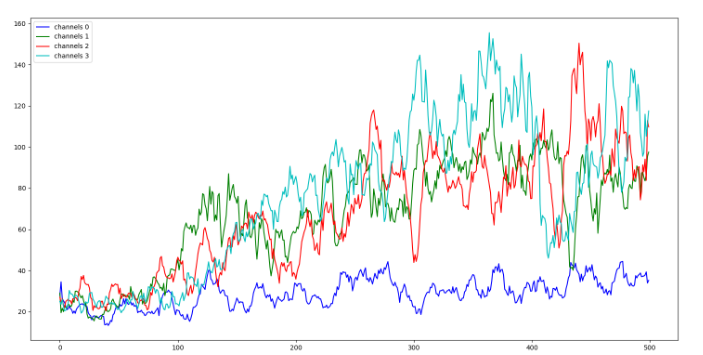




From above chart, we can see that our agent just with one input (channels 0) performed the worsts, even our random agent could perform in a similar way. Then we can see, that agents who have more channels than one performs better, and we can assume that more channels our agent sees, better it perform.

